# Sentiment Analysis on Text Data
Lilian (Yuanyuan) Sun | lilian@curajoy.com <br>

[Data Source (Concerns)](https://airtable.com/appj4suNRnS6DWVkg/tblhM6RESfcxM0GIx/viwLkyTYNEKPB88qd?blocks=hide)

In [2]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Download the VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

# Create an instance of the SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Load Data

In [4]:
concerns_df = pd.read_csv('./data samples-02-28-2024/Concerns-2-28-2024-V0.3.csv')

concerns_df.head()

,Concerns,More detailed descriptions,User Inputs,Intents,Quests (Goals),Status,Scoring Groups,Intent Groups,Coaches Responses,Linked Behaviors,Linked Activities
0,Better academics,want/need to do better in school. If just not...,Better academics,"MoodFrustrated, MoodStressed, Mood-Journal, Pe...","Plan better (time management), Finish what I s...",NaN,NaN,NaN,NaN,Doing something other than assignment,"apply to 5 colleges, apply to 5 jobs, assemble..."
1,Active Quest,user is a primary or participating quester,Active Quest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ADHD,diagnosed with ADHD or suspects ADHD,ADHD,"Tardies, Absences, MoodFrustrated, Invite Chec...","Take care of my body, Healthy relationship wit...",NaN,"Special Ed, Access/Tangible Function, Escape/A...",NaN,NaN,Doing something other than assignment,"take my medication(s) as prescribed, Be ready ..."
3,Excess Alcohol,"dealing with stress by excessive drinking, bin...",Excess Alcohol,Absences,"Practice impulse control and moderation, Cut m...",NaN,"Alcohol Suspected, High difficulties, Slightly...",NaN,NaN,Binge drinking,Arrange childcare for a night
4,Anger,"difficulty controlling anger or rage, needs he...",Anger,"MoodAngry, MoodFrustrated","Winning and losing graciously, Practice impuls...",NaN,"High difficulties, Slightly raised difficultie...",NaN,NaN,NaN,"do a body check in, Become more self aware by ..."


# Data Exploration

In [8]:
# View the DataFrame Information
concerns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Concerns                    2100 non-null   object 
 1   More detailed descriptions  66 non-null     object 
 2   User Inputs                 2100 non-null   object 
 3   Intents                     23 non-null     object 
 4   Quests (Goals)              54 non-null     object 
 5   Status                      0 non-null      float64
 6   Scoring Groups              46 non-null     object 
 7   Intent Groups               10 non-null     object 
 8   Coaches Responses           0 non-null      float64
 9   Linked Behaviors            6 non-null      object 
 10  Linked Activities           50 non-null     object 
dtypes: float64(2), object(9)
memory usage: 180.6+ KB


In [9]:
# View DataFrame Statistical Summary
# generates descriptive statistics summarizing the central tendency, dispersion, and shape of the distribution of numerical columns in the DataFrame.
concerns_df.describe()

,Status,Coaches Responses
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [10]:
# PERFORM DATA VISUALIZATION
concerns_df.isnull()

,Concerns,More detailed descriptions,User Inputs,Intents,Quests (Goals),Status,Scoring Groups,Intent Groups,Coaches Responses,Linked Behaviors,Linked Activities
0,False,False,False,False,False,True,True,True,True,False,False
1,False,False,False,True,True,True,True,True,True,True,True
2,False,False,False,False,False,True,False,True,True,False,False
3,False,False,False,False,False,True,False,True,True,False,False
4,False,False,False,False,False,True,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...
2095,False,True,False,True,True,True,True,True,True,True,True
2096,False,True,False,True,True,True,True,True,True,True,True
2097,False,True,False,True,True,True,True,True,True,True,True
2098,False,True,False,True,True,True,True,True,True,True,True


<AxesSubplot:>

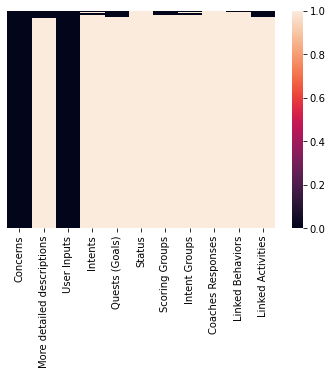

In [11]:
# quickly identify the presence and pattern of missing values in the DataFrame
sns.heatmap(concerns_df.isnull(), yticklabels = False)
# visualizes this DataFrame as a heatmap, where missing values are represented as colored cells.

<AxesSubplot:xlabel='Concerns', ylabel='count'>

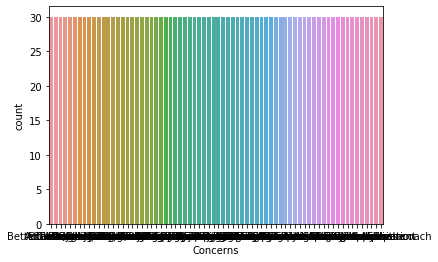

In [14]:
# Plot the count plot for the concerns
sns.countplot(x = concerns_df['Concerns'])

# User Inputs (Data Samples generated by ChatGPT)

In [6]:
# Example conversation generated by ChatGPT
conversation = [
    "A: Hey, can we talk for a bit? I've been feeling a bit overwhelmed lately.",
    "B: Of course, what's been going on?",
    "A: Well, it's just that I've been having trouble focusing on anything lately. It's like my mind is constantly jumping from one thing to another, and I can't seem to stay on track with anything I try to do.",
    "B: I can imagine how frustrating that must be. Have you tried using any strategies to help you stay focused?",
    "A: Yeah, I've tried making to-do lists and setting reminders, but even those seem to get lost in the shuffle. It's like I'll start one task, get distracted by something else, and then completely forget what I was originally doing.",
    "B: That sounds really challenging. Have you considered talking to a doctor or therapist about it? They might be able to offer some additional strategies or even medication to help manage your symptoms.",
    "A: Yeah, I've been thinking about it. I just worry that people won't understand or will think I'm just making excuses for being lazy or forgetful.",
    "B: I understand your concerns, but remember that seeking help isn't about making excuses – it's about finding ways to better manage your symptoms so you can live your best life.",
    "A: Thanks, I appreciate your support. I'll think about reaching out for help. It's just nice to have someone to talk to who understands what I'm going through.",
    "B: Anytime, I'm here for you. Remember, you're not alone in this – there are plenty of people who have faced similar challenges and have found ways to overcome them."
]

# Function: detect_concern(text)

In [19]:
# Define a function to detect concern based on text
def detect_concern(text):
    # Analyze the sentiment of the text
    sentiment_scores = sid.polarity_scores(text)
    
    # Check if the sentiment indicates concern
    if sentiment_scores['neg'] > sentiment_scores['pos']:
        return True
    else:
        return False


In [20]:
# Check for concern in each statement of the conversation
for satement in conversation:
    if detect_concern(satement):
        print('\033[91m' + "\nThis statement indicates concern:->", satement)
    else:
        print('\033[92m' + "\nThis statement does not indicate concern:->", satement)



This statement does not indicate concern:-> A: Hey, can we talk for a bit? I've been feeling a bit overwhelmed lately.

This statement does not indicate concern:-> B: Of course, what's been going on?

This statement does not indicate concern:-> A: Well, it's just that I've been having trouble focusing on anything lately. It's like my mind is constantly jumping from one thing to another, and I can't seem to stay on track with anything I try to do.

This statement does not indicate concern:-> B: I can imagine how frustrating that must be. Have you tried using any strategies to help you stay focused?

This statement indicates concern:-> A: Yeah, I've tried making to-do lists and setting reminders, but even those seem to get lost in the shuffle. It's like I'll start one task, get distracted by something else, and then completely forget what I was originally doing.

This statement does not indicate concern:-> B: That sounds really challenging. Have you considered talking to a doctor or the

## Function: detect_concern(classified_concern, text)

In [24]:
# Define a function to detect concern based on text
def detect_concern(classified_concern, text):
    # Analyze the sentiment of the text
    sentiment_scores = sid.polarity_scores(text)
    
    # Check if the sentiment indicates concern
    if sentiment_scores['neg'] > sentiment_scores['pos']:
        return True
    else:
        return False

In [26]:
# Check for concern in each statement of the conversation
# Test case: ADHD
classified_concern = 'ADHD'

# Check for concern in each statement of the conversation
for statement in conversation:
    if detect_concern(classified_concern, statement):
        print('\033[91m' + f"\nThis statement indicates {classified_concern} concern:->", statement)
    else:
        print('\033[92m' + f"\nThis statement does not indicate {classified_concern} concern:->", statement)



This statement does not indicate ADHD concern:-> A: Hey, can we talk for a bit? I've been feeling a bit overwhelmed lately.

This statement does not indicate ADHD concern:-> B: Of course, what's been going on?

This statement does not indicate ADHD concern:-> A: Well, it's just that I've been having trouble focusing on anything lately. It's like my mind is constantly jumping from one thing to another, and I can't seem to stay on track with anything I try to do.

This statement does not indicate ADHD concern:-> B: I can imagine how frustrating that must be. Have you tried using any strategies to help you stay focused?

This statement indicates ADHD concern:-> A: Yeah, I've tried making to-do lists and setting reminders, but even those seem to get lost in the shuffle. It's like I'll start one task, get distracted by something else, and then completely forget what I was originally doing.

This statement does not indicate ADHD concern:-> B: That sounds really challenging. Have you conside